<a href="https://colab.research.google.com/github/sahandfrd94/Image-classificqation-by-VGG-structure/blob/main/image_classification_by_VGG_structure_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import dataset

In [2]:
from keras.datasets import cifar10
import numpy as np

In [3]:
(x_train,y_train) , (x_val , y_val) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


# Scan dataset

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


horse


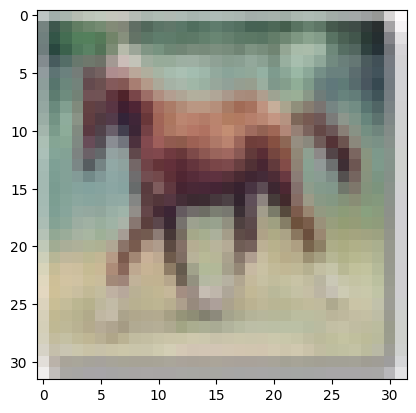

In [5]:
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
import matplotlib.pyplot as plt
plt.imshow(x_train[23456])
label = y_train[23456]
print(classes[label[0]])

#preprocessing

In [6]:
x_train = x_train/255
x_val = x_val/255

In [7]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

#Create VGG stracture

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPool2D,Flatten

In [9]:
vgg = Sequential()
vgg.add(Conv2D(32 , (3,3) , activation = 'relu' , input_shape=(32, 32, 3),padding = 'same' , kernel_initializer= 'he_uniform'))
vgg.add(Conv2D(32 , (3,3),activation = 'relu' , padding = 'same' , kernel_initializer = 'he_uniform'))
vgg.add(MaxPool2D())
vgg.add(Dropout(0.2))

vgg.add(Conv2D(64 , (3,3) , activation='relu' , padding = 'same', kernel_initializer = 'he_uniform'))
vgg.add(Conv2D(64 , (3,3) , activation='relu' , padding = 'same', kernel_initializer = 'he_uniform'))
vgg.add(MaxPool2D())
vgg.add(Dropout(0.2))

vgg.add(Conv2D(128 , (3,3) , activation='relu' , padding = 'same', kernel_initializer = 'he_uniform'))
vgg.add(Conv2D(128 , (3,3) , activation='relu' , padding = 'same', kernel_initializer = 'he_uniform'))
vgg.add(MaxPool2D())
vgg.add(Dropout(0.2))

vgg.add(Flatten())
vgg.add(Dense(128 , 'relu'))
vgg.add(Dense(10 , 'softmax'))

In [10]:
vgg.compile(
    optimizer ='adam',
    metrics = ['accuracy'],
    loss = 'categorical_crossentropy'
)

In [11]:
vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [12]:
train = vgg.fit(
    x_train,y_train,
    epochs =50,
    batch_size = 128,
    verbose = 1,
    validation_data = (x_val , y_val)

)

Epoch 1/50
391/391 [==============================] - 15s 20ms/step - loss: 1.7409 - accuracy: 0.3588 - val_loss: 1.3330 - val_accuracy: 0.5157
Epoch 2/50
391/391 [==============================] - 6s 16ms/step - loss: 1.2275 - accuracy: 0.5585 - val_loss: 1.0028 - val_accuracy: 0.6497
Epoch 3/50
391/391 [==============================] - 6s 15ms/step - loss: 0.9771 - accuracy: 0.6549 - val_loss: 0.8489 - val_accuracy: 0.7068
Epoch 4/50
391/391 [==============================] - 6s 16ms/step - loss: 0.8312 - accuracy: 0.7071 - val_loss: 0.7958 - val_accuracy: 0.7272
Epoch 5/50
391/391 [==============================] - 6s 15ms/step - loss: 0.7401 - accuracy: 0.7386 - val_loss: 0.7182 - val_accuracy: 0.7540
Epoch 6/50
391/391 [==============================] - 6s 16ms/step - loss: 0.6678 - accuracy: 0.7670 - val_loss: 0.6707 - val_accuracy: 0.7723
Epoch 7/50
391/391 [==============================] - 6s 16ms/step - loss: 0.6098 - accuracy: 0.7856 - val_loss: 0.6376 - val_accuracy: 0.789

#PLOT ACCURACY

In [13]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

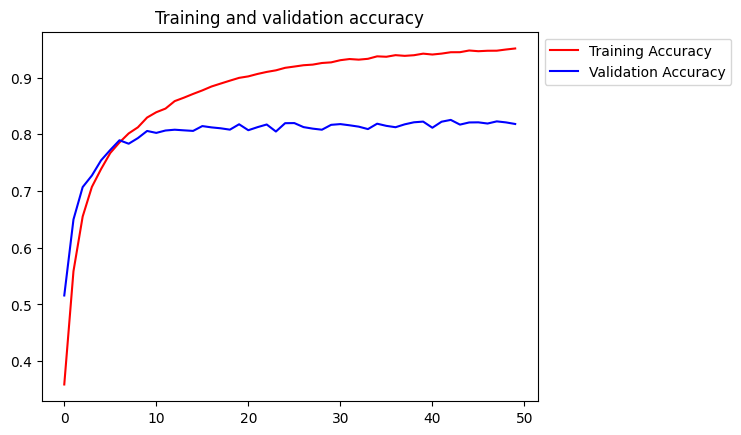

<Figure size 640x480 with 0 Axes>

In [19]:
acc=train.history['accuracy']
val_acc=train.history['val_accuracy']

epochs=range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend(bbox_to_anchor =(1, 1), ncol = 1)
plt.figure()